csv文件的预测
demo01

In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import xgboost
data = pd.read_csv('data/Iris.csv')
data_training = data[0:int(len(data)*4/5)]
data_test = data[int(len(data)*4/5):len(data)]
#分割
train_x = np.array(data_training.iloc[:, [i for i in range(data_training.shape[1]-1)]])
train_y = np.array(data_training['Species'])
test_x = np.array(data_test.iloc[:, [i for i in range(data_test.shape[1]-1)]])
test_y = np.array(data_test['Species'])
print("load data")

load data


In [3]:
clf=XGBClassifier(base_score=0.5, booster='gbtree', learning_rate=0.05, max_depth=8, n_estimators=50)
clf.fit(train_x, train_y)

[15:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\software\Anoconda\envs\env_lime\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [4]:
print(clf.score(test_x, test_y))
print(test_x[0])

1.0
[121.    6.9   3.2   5.7   2.3]


D:\software\Anoconda\envs\env_lime\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


保存这个模型

In [5]:
#clf.save_model('xgb.model')

In [12]:
#模型加载
xgb=xgboost.XGBClassifier()
xgb.load_model('xgb.model')
"""用两种方法做预测"""
pre=xgb.predict(np.array([[91, 5.5, 2.6, 4.4, 1.2]]))
pre1=xgb.predict(test_x[[0]])
print(pre, pre1)
print("test :", len(test_x))
print("accuracy : ", clf.score(test_x, test_y))


['Iris-versicolor'] ['Iris-versicolor']
test : 30
accuracy :  1.0


D:\software\Anoconda\envs\env_lime\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


demo 02 使用sklearn的数据集

[20:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9666666666666667


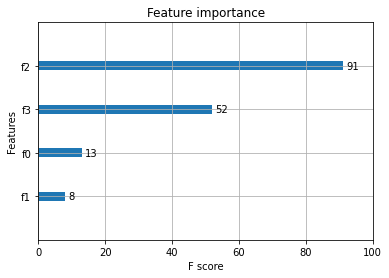

In [3]:
import time
import numpy as np
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pylab as plt
import os

iris = load_iris()
X, y= iris.data, iris.target
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

params ={
    'booster': 'gbtree',

    'objective': 'multi:softmax',
    'num_class':3,

    'gamma':0.1
}
plst = list(params.items())
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb. DMatrix(x_test)

num_rounds = 50
model = xgb.train(plst, dtrain, num_rounds)

y_pred = model.predict(dtest)

acc = accuracy_score(y_test, y_pred)
print(acc)

plot_importance(model)
plt.show()

ImportError: You must install graphviz to plot tree

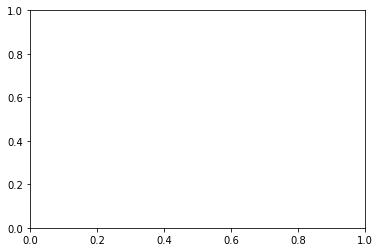

In [4]:
plot_tree(model, num_trees=5)